In [2]:
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import seaborn as sns
import torch
import tifffile
import yaml
from torchio.transforms import Resize
from einops import rearrange

import napari

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
import mushroom.visualization.viewer as viewer
from mushroom.visualization.napari import display_napari

In [6]:
config_filepath = '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/mushroom_outputs/multiplex/config_local.yaml'
outputs_filepath = '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/mushroom_outputs/multiplex/outputs.pt'


In [7]:
data = torch.load(outputs_filepath)
data.keys()

dict_keys(['recon_embs', 'recon_imgs', 'true_imgs', 'cluster_distances', 'cluster_distance_volume', 'cluster_centroids', 'cluster_ids'])

In [8]:
for k, v in data.items():
    print(k, v.shape)

recon_embs torch.Size([4, 1024, 60, 60])
recon_imgs torch.Size([4, 24, 1920, 1920])
true_imgs torch.Size([4, 24, 1920, 1920])
cluster_distances torch.Size([4, 60, 60, 20])
cluster_distance_volume torch.Size([30, 60, 60, 20])
cluster_centroids torch.Size([20, 1024])
cluster_ids torch.Size([4, 60, 60])


In [9]:
config = yaml.safe_load(open(config_filepath))
sections = config['sections']
sections

[{'data': [{'dtype': 'he',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s0_he.tif'},
   {'dtype': 'visium',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s0_visium.h5ad'}],
  'id': 's0',
  'position': 0},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s1_multiplex.ome.tiff'}],
  'id': 's1',
  'position': 1},
 {'data': [{'dtype': 'multiplex',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s2_multiplex.ome.tiff'}],
  'id': 's2',
  'position': 11},
 {'data': [{'dtype': 'he',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/registered/s3_he.tif'},
   {'dtype': 'visium',
    'filepath': '/Users/erikstorrs/Documents/ding/mushroom/data/examples/HT397B1_v1/registration/r

In [10]:
obj = viewer.MushroomViewer(config, data, downsample=.5)

In [20]:
dtype_to_marker = {
    'visium': ['EPCAM', 'CD8A', 'IL7R'],
    'multiplex': ['Pan-Cytokeratin', 'CD8', 'CD45', 'SMA']
}

napari_args_list = obj.get_sections(dtype_to_marker=dtype_to_marker)

In [21]:
# napari_args_list[3]

In [42]:
display_napari(napari_args_list, obj.volume)
napari.run()

In [27]:
from mushroom.visualization.napari import to_uint8

In [31]:
volume = obj.volume.max() - obj.volume
volume = to_uint8(volume)
volume.shape

(20, 17, 960, 960)

In [33]:
volume.mean(axis=(1,2,3))

array([100.79606592, 102.55868483, 101.838717  , 101.60108507,
        91.69741039,  88.65454433, 104.88467084, 100.44085593,
        99.50361245, 103.23097631,  83.23634772, 104.31251666,
        96.8032164 ,  81.83422635,  87.43895361,  96.21299811,
        98.45984164, 105.38283171, 102.9230329 ,  97.19070664])

In [ ]:
pct = .99
pct = 

In [38]:
obj.volume.shape

torch.Size([20, 17, 960, 960])

In [39]:
probs = torch.nn.functional.softmax(obj.volume, dim=0)
probs.shape

torch.Size([20, 17, 960, 960])

/Users/erikstorrs/miniconda3/envs/mushroom-dev/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


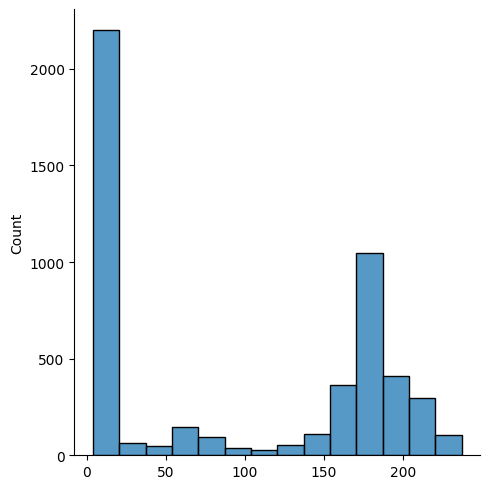

In [35]:
sns.displot(np.random.choice(volume[19].flatten(), size=5000))

/Users/erikstorrs/miniconda3/envs/mushroom-dev/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


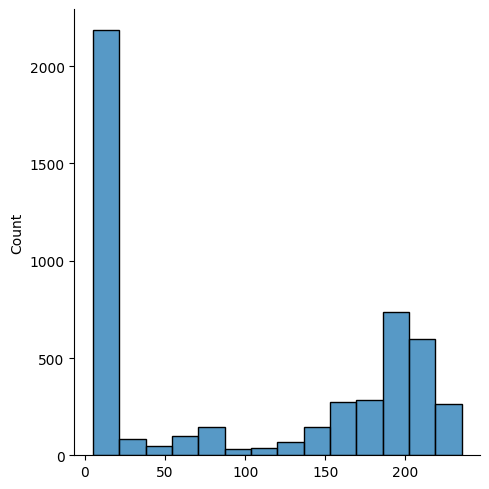

In [36]:
sns.displot(np.random.choice(volume[18].flatten(), size=5000))

/Users/erikstorrs/miniconda3/envs/mushroom-dev/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


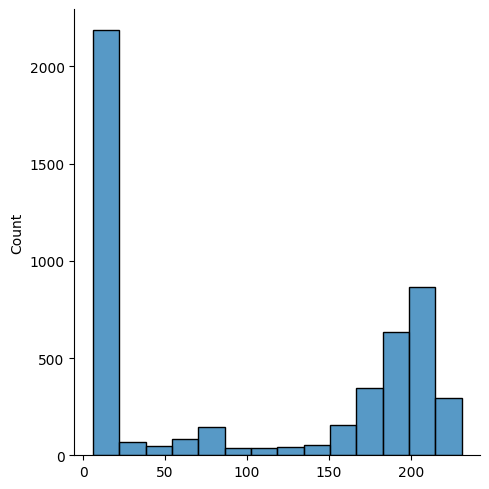

In [37]:
sns.displot(np.random.choice(volume[17].flatten(), size=5000))

In [ ]:
pct = .99
pc